# 개봉 전

In [2]:
import pandas as pd

In [3]:
xb5i75 = pd.read_csv("data/xb5i75.csv")
llpvjso = pd.read_csv("data/11pvjso.csv")
l2zkbg0 = pd.read_csv("data/12zkbg0.csv")
xdgviq = pd.read_csv("data/xdgviq.csv")

In [4]:
df = pd.DataFrame(pd.concat([xb5i75.body,llpvjso.body, l2zkbg0.body, xdgviq.body], axis=0))

In [5]:
df = df.drop(0) #게시판 안내문 제거 

In [6]:
df.drop_duplicates(subset=['body'],inplace=True) #중복제거

In [7]:
df = df.reset_index(drop=True)

## clean

In [8]:
#removed, deleted 제거 (레딧 댓글에서 검열되거나 삭제된 부분들)
df = df[df.body != ('[removed]')]
df = df[df.body != ('[deleted]')]

In [9]:
print('전처리 후 학습용 샘플의 개수:', len(df))

전처리 후 학습용 샘플의 개수: 5936


In [12]:
df.to_csv("개봉전리뷰(5936개).csv",index=False, encoding='utf-8-sig') 

In [13]:
#series로 변환 
my_text = df.body.copy()

In [14]:
my_text

0       I will never not read this actress’s name as H...
2       Her voice seemed beautiful honestly. Just feel...
3       Am I the only one who keeps reading Halle Berr...
4       My only problem with this movie is that it's h...
5       People should be more mad that the Disney vers...
                              ...                        
5933    Because it is an adaptation. You adapt.\n\nI g...
5934    Isn't the point of an adaptation to change thi...
5935    The point of an adaptation is to translate a w...
5936    I don't understand why you're not just as crit...
5937    As i repeat, i argue that, if you are making a...
Name: body, Length: 5936, dtype: object

In [15]:
import nltk

In [16]:
#문장토큰화
result_stc = []
for token in my_text:
    sent_tokens = nltk.sent_tokenize(token)
    result_stc.append(sent_tokens)

In [17]:
#단어토큰화_이중리스트 살리기
result_wd = []

for sublist in result_stc:
    tokenized_sublist = []
    for sentence in sublist:
        word_tokens = nltk.word_tokenize(sentence)
        tokenized_sublist.extend(word_tokens)
    result_wd.append(tokenized_sublist)

In [18]:
#클린1
# 알파벳, 숫자, 공백, 밑줄('_')이 아닌 모든 문자 제거 
import re
p = re.compile(r"[^\w\s]|_") 

cleaned_lists1 = []

for sub_list in result_wd:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists1.append(cleaned_sub_list)

In [19]:
#클린2
#소문자+대문자인 경우 분리
import re
p = re.compile(r'(?<=[a-z])(?=[A-Z])')

cleaned_lists2 = []

for sub_list in cleaned_lists1:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists2.append(cleaned_sub_list)


In [20]:
#클린3
#대문자+대문자인 경우 분리
import re
p = re.compile(r'(?<=[A-Z])(?=[A-Z][a-z])')

cleaned_lists2_1 = []

for sub_list in cleaned_lists2:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists2_1.append(cleaned_sub_list)


In [21]:
#클린3
#알파벳과 공백이 아닌 문자, 숫자, 그리고 "http"로 시작하는 문자열 매칭하여 삭제
import re
p = re.compile(r"[^a-zA-Z\s]|\d+|http\S+")

cleaned_lists3 = []

for sub_list in cleaned_lists2_1:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub('', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists3.append(cleaned_sub_list)

In [22]:
#클린4 
#공백리스트제거 
filtered_list = [[item for item in sublist if item.strip()] for sublist in cleaned_lists3]

In [23]:
filtered_list

[['I',
  'will',
  'never',
  'not',
  'read',
  'this',
  'actress',
  's',
  'name',
  'as',
  'Halle',
  'Berry'],
 ['Her',
  'voice',
  'seemed',
  'beautiful',
  'honestly',
  'Just',
  'feel',
  'like',
  'little',
  'mermaid',
  'will',
  'not',
  'translate',
  'well',
  'in',
  'live',
  'action'],
 ['Am',
  'I',
  'the',
  'only',
  'one',
  'who',
  'keeps',
  'reading',
  'Halle',
  'Berry',
  'instead',
  'of',
  'Halle',
  'Bailey',
  'I',
  'tripped',
  'the',
  'fuck',
  'out',
  'when',
  'I',
  'saw',
  'the',
  'trailer',
  'and',
  'it',
  'was',
  'n t',
  'Halle',
  'Berry',
  'and',
  'thought',
  'who',
  'the',
  'fuck',
  'is',
  'that',
  'Damn',
  'I',
  ' m',
  'old'],
 ['My',
  'only',
  'problem',
  'with',
  'this',
  'movie',
  'is',
  'that',
  'it',
  ' s',
  'happening',
  'at',
  'all'],
 ['People',
  'should',
  'be',
  'more',
  'mad',
  'that',
  'the',
  'Disney',
  'version',
  'doesn',
  't',
  'end',
  'with',
  'Arielle',
  'turning',
  'int

In [24]:
#각 리스트 내의 원소들 중에 띄어쓰기가 있는 경우, 해당 원소를 2개의 원소로 분리
result_list = []

for sublist in filtered_list:
    temp_list = []
    for item in sublist:
        if ' ' in item:
            words = item.split()
            temp_list.extend(words)
        else:
            temp_list.append(item)
    result_list.append(temp_list)

In [25]:
#소문자변환
lowercase_lists = []

for sub_list in result_list:
    lowercase_sub_list = [word.lower() for word in sub_list]
    lowercase_lists.append(lowercase_sub_list)

In [26]:
#빈리스트 제거 
filtered_lists = [sublist for sublist in lowercase_lists if sublist]

In [27]:
#stopword 제거
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

stopword_removed = []

for sub_list in filtered_lists:
    filtered_sub_list = [word for word in sub_list if word not in stopwords]
    stopword_removed.append(filtered_sub_list)

In [28]:
#lemmatizing 'spacy' 이용 
import spacy

nlp = spacy.load('en_core_web_sm')
lemmatized_lists = []

for sublist in stopword_removed:
    doc = nlp(" ".join(sublist))
    lemmatized_sublist = [token.lemma_ if token.pos_ == 'VERB' else token.text for token in doc]
    lemmatized_lists.append(lemmatized_sublist)


In [29]:
#빈리스트 제거 
filtered_lists = [sublist for sublist in lemmatized_lists if sublist]

In [30]:
#길이수 2개이하, 추가단어들 제거

#해시태그, URL에 섞여있던 단어들, 붙어있던 단어들 제거 
remove_words = ["boundingintocomics",
"lmfaoooooooooooooooo",
"grrrrrrrrrrrrrrrrrrr",
"returnyoutubedislike",
"returnyoutubedislike",
"disaaaappointeeeeeddd",
"returnyoutubedislikeapi",
"baaaaaaaaaaaaaaaaaaaaaad",
"gebbhagfogifgggkldgodflihgfeippi",
"boundingintocomics",
"bahahahahahahahha",
"bringbackmanatees",
"littlemermaidfans",
"missedopportunity",
"goodhousekeeping",
"samejokebutworse",
"rightrightright",
"nothowdrugswork",
"gylelenhuleugh",
"oooooooooohhhh",
"bwaaaaaaaaaaaa"]



result_list = []

for sublist in filtered_lists:
    temp_list = []
    for item in sublist:
        if len(item) > 2 and item not in remove_words:
            temp_list.append(item)
    result_list.append(temp_list)

In [161]:
#리스트 하나로 합치기
merged_list = [word for sublist in result_list for word in sublist]

## pos tagging

In [162]:
import spacy

nlp = spacy.load('en_core_web_sm')

tagged_list = []

for word in merged_list:
    doc = nlp(word)
    token = doc[0]
    tagged_list.append((token.text, token.pos_))


In [163]:
tagged_list

[('never', 'ADV'),
 ('read', 'VERB'),
 ('actress', 'NOUN'),
 ('name', 'NOUN'),
 ('halle', 'PROPN'),
 ('berry', 'VERB'),
 ('voice', 'NOUN'),
 ('seem', 'VERB'),
 ('beautiful', 'ADJ'),
 ('honestly', 'ADV'),
 ('feel', 'VERB'),
 ('like', 'INTJ'),
 ('little', 'ADJ'),
 ('mermaid', 'VERB'),
 ('translate', 'VERB'),
 ('well', 'INTJ'),
 ('live', 'VERB'),
 ('action', 'NOUN'),
 ('one', 'NUM'),
 ('keep', 'VERB'),
 ('read', 'VERB'),
 ('halle', 'PROPN'),
 ('berry', 'VERB'),
 ('instead', 'ADV'),
 ('halle', 'PROPN'),
 ('bailey', 'NOUN'),
 ('trip', 'NOUN'),
 ('fuck', 'NOUN'),
 ('see', 'VERB'),
 ('trailer', 'NOUN'),
 ('halle', 'PROPN'),
 ('berry', 'VERB'),
 ('think', 'VERB'),
 ('fuck', 'NOUN'),
 ('damn', 'ADV'),
 ('old', 'ADJ'),
 ('problem', 'NOUN'),
 ('movie', 'NOUN'),
 ('happen', 'VERB'),
 ('people', 'NOUN'),
 ('mad', 'ADJ'),
 ('disney', 'NOUN'),
 ('version', 'NOUN'),
 ('end', 'NOUN'),
 ('arielle', 'PROPN'),
 ('turn', 'VERB'),
 ('sea', 'NOUN'),
 ('foam', 'NOUN'),
 ('honor', 'NOUN'),
 ('original', 'ADJ')

In [164]:
wd_posjj = [item for item in tagged_list if item[1] == 'NOUN' or item[1] == 'PROPN' or item[1] == 'ADJ']

# 명사,형용사만 추출 

In [165]:
jj = pd.DataFrame(wd_posjj)[0]

In [166]:
jjj = pd.DataFrame(jj)[pd.DataFrame(jj)[0] != 'fuck'][0]
#욕설제거

## wordcloud

In [167]:
from wordcloud import WordCloud

In [168]:
comments = ' '.join(jjj)

In [169]:
from PIL import Image
import numpy as np

In [170]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [171]:
from wordcloud import WordCloud
font_path = "/Library/Fonts/NanumGothic.ttf"
cloud = WordCloud(font_path=font_path)

/opt/anaconda3/envs/text/lib/python3.8/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


/opt/anaconda3/envs/text/lib/python3.8/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


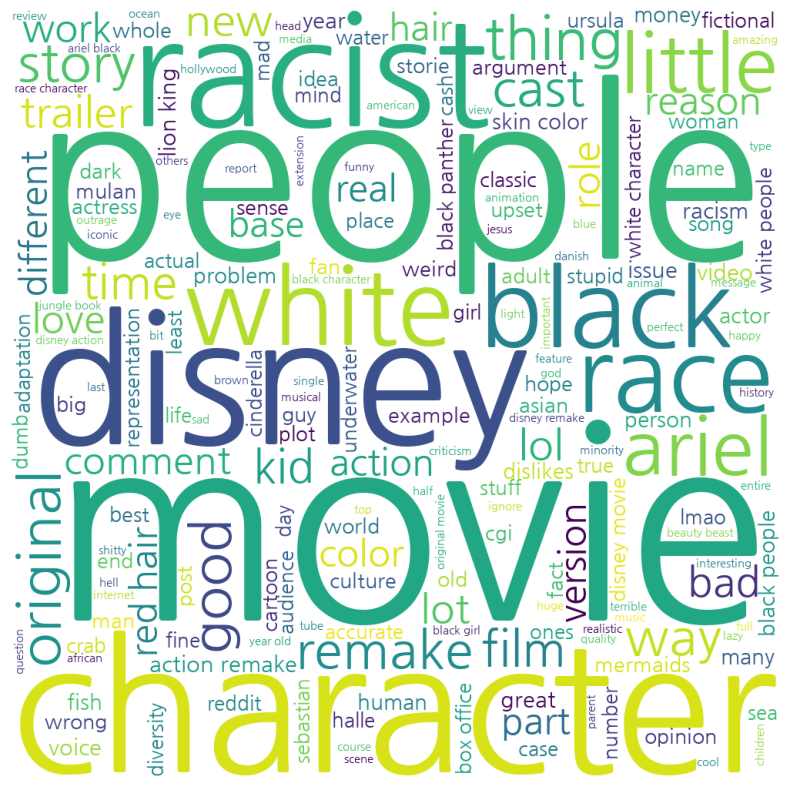

In [172]:
cloud = WordCloud(font_path = font_path, 
                  background_color = 'white', 
                  width=1000, height=1000, )

my_cloud1 = cloud.generate_from_text(comments)

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr1)
plt.axis('off')
plt.show()
# fig.savefig('wordcloud_without_axisoff.png') 생성한 그림 저장하기

# 인어공주영화리뷰

## summation

In [33]:
import pandas as pd

In [34]:
r1 = pd.read_csv("data/인어공주rottentomato리뷰.csv")
r2 = pd.read_csv("data/imdb리뷰.csv")

In [35]:
r1

,Reviewer,Rating,Review Text
0,Doris Hecker,5,A definite must see Movie !!! Alot of differen...
1,JARPER,5,Less songs and more excitement. The new versio...
2,tara h,5,"It was soooo good, visual effects were amazin..."
3,Tracey,5,The movie was excellent
4,witallsmiles,5,It was just like the animated movie
...,...,...,...
4211,Brady,5,Fantastic film which lived up to my expectations!
4212,Daniel K,3,The animated version was much better! The roma...
4213,Robert E. Acuna,4,"Son of a fish, this Disney remake actually sla..."
4214,Alejandrina,4,CGI was a little off but other than that great...


In [36]:
r2

,제목,평점,내용
0,WHY WHY WHY DISNEY? DO YOU KEEP MAKING LIVE AC...,6.0,You'd think a company like Disney with the amo...
1,It's hard to rate,6.0,I went to see this movie with the attitude tha...
2,A Shallow Dive That Missed its Mark,6.0,This live action remake was a disappointing at...
3,"Uninspired, disappointing.",2.0,I saw this movie openining night. I have alway...
4,Dark and Gloomy,NaN,No excitement or joy. Maybe the movie was rush...
...,...,...,...
865,Fantastic! A must see in 3- D on the big screen!,10.0,Halle Bailey is Fantastic. Her singing gave me...
866,Beautiful film,9.0,2 out of 12 found this helpful. Was this revie...
867,Definitely one of the better live action remakes,8.0,Flounder lost his charm but I never really lik...
868,Not PERFECT but Best Live Action Yet!,9.0,A lot of people are being hard on this movie b...


In [37]:
r2['Review Text'] = r2['제목'] + r2['내용']

In [38]:
r1 = r1[['Rating','Review Text']]
r2 = r2[['평점','Review Text']]

In [39]:
r2.columns = ['Rating','Review Text']

In [40]:
df = pd.DataFrame(pd.concat([r1, r2], axis=0))

In [41]:
df.drop_duplicates(['Review Text'],inplace=True)

In [42]:
my_text = df['Review Text']

In [95]:
#pd.DataFrame(my_text).to_csv("개봉후리뷰(5072개).csv", index=False, encoding='utf-8-sig')

## cleaning code

In [96]:
import nltk

In [97]:
#문장토큰화
result_stc = []
for token in my_text:
    sent_tokens = nltk.sent_tokenize(token)
    result_stc.append(sent_tokens)

In [98]:
#단어토큰화_이중리스트 살리기
result_wd = []

for sublist in result_stc:
    tokenized_sublist = []
    for sentence in sublist:
        word_tokens = nltk.word_tokenize(sentence)
        tokenized_sublist.extend(word_tokens)
    result_wd.append(tokenized_sublist)

In [99]:
#클린1
# 알파벳, 숫자, 공백, 밑줄('_')이 아닌 모든 문자 제거 
import re
p = re.compile(r"[^\w\s]|_") 

cleaned_lists1 = []

for sub_list in result_wd:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists1.append(cleaned_sub_list)

In [100]:
#클린2
#소문자+대문자인 경우 분리
import re
p = re.compile(r'(?<=[a-z])(?=[A-Z])')

cleaned_lists2 = []

for sub_list in cleaned_lists1:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists2.append(cleaned_sub_list)


In [101]:
#클린3
#대문자+대문자인 경우 분리

import re
p = re.compile(r'(?<=[A-Z])(?=[A-Z][a-z])')

cleaned_lists2_1 = []

for sub_list in cleaned_lists2:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub(' ', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists2_1.append(cleaned_sub_list)


In [102]:
#클린3
#알파벳과 공백이 아닌 문자, 숫자, 그리고 "http"로 시작하는 문자열 매칭하여 삭제
import re
p = re.compile(r"[^a-zA-Z\s]|\d+|http\S+")

cleaned_lists3 = []

for sub_list in cleaned_lists2_1:
    cleaned_sub_list = []
    for word in sub_list:
        cleaned_word = p.sub('', word)
        if cleaned_word != '':
            cleaned_sub_list.append(cleaned_word)
    cleaned_lists3.append(cleaned_sub_list)

In [103]:
#클린4 
#공백리스트제거 
filtered_list = [[item for item in sublist if item.strip()] for sublist in cleaned_lists3]

In [104]:
filtered_list

[['A',
  'definite',
  'must',
  'see',
  'Movie',
  'Alot',
  'of',
  'different',
  'emotions',
  'which',
  'had',
  'a',
  'Happy',
  'Ending'],
 ['Less',
  'songs',
  'and',
  'more',
  'excitement',
  'The',
  'new',
  'version',
  'was',
  'the',
  'best',
  'version',
  'of',
  'The',
  'Little',
  'Mermaid'],
 ['It',
  'was',
  'soooo',
  'good',
  'visual',
  'effects',
  'were',
  'amazing',
  'story',
  'was',
  'great',
  'acting',
  'and',
  'singing',
  'was',
  'amazing'],
 ['The', 'movie', 'was', 'excellent'],
 ['It', 'was', 'just', 'like', 'the', 'animated', 'movie'],
 ['This',
  'movie',
  'was',
  'really',
  'good',
  'I',
  ' m',
  'glad',
  'there',
  'were',
  'slight',
  'changes',
  'but',
  'did',
  'n t',
  'stray',
  'too',
  'far',
  'from',
  'the',
  'Disney',
  'version',
  'I',
  ' ve',
  'already',
  'seen',
  'it',
  'twice'],
 ['It',
  'was',
  'a',
  'cute',
  'movie',
  'but',
  'the',
  'script',
  'felt',
  'forced',
  'like',
  'they',
  'were'

In [105]:
#각 리스트 내의 원소들 중에 띄어쓰기가 있는 경우, 해당 원소를 2개의 원소로 분리
result_list = []

for sublist in filtered_list:
    temp_list = []
    for item in sublist:
        if ' ' in item:
            words = item.split()
            temp_list.extend(words)
        else:
            temp_list.append(item)
    result_list.append(temp_list)

In [106]:
#소문자변환
lowercase_lists = []

for sub_list in result_list:
    lowercase_sub_list = [word.lower() for word in sub_list]
    lowercase_lists.append(lowercase_sub_list)

In [107]:
#빈리스트 제거 
filtered_lists = [sublist for sublist in lowercase_lists if sublist]

In [108]:
#stopword 제거
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

stopword_removed = []

for sub_list in filtered_lists:
    filtered_sub_list = [word for word in sub_list if word not in stopwords]
    stopword_removed.append(filtered_sub_list)

In [109]:
#lemmatizing 'spacy' 이용 > WordNetLemmatizer가 ate, could등을 제대로 변환못함.
import spacy

nlp = spacy.load('en_core_web_sm')
lemmatized_lists = []

for sublist in stopword_removed:
    doc = nlp(" ".join(sublist))
    lemmatized_sublist = [token.lemma_ if token.pos_ == 'VERB' else token.text for token in doc]
    lemmatized_lists.append(lemmatized_sublist)


In [110]:
#빈리스트 제거 
filtered_lists = [sublist for sublist in lemmatized_lists if sublist]

In [111]:
#길이수 2개이하, 추가단어들 제거

remove_words = ['amazingggggggggg', 'amazinnnnnnnng', 'peeeeeeeeeeeeerfect', 'seaaaaaaaaaaaaaaaaaaaaa', 'toooo']

result_list = []

for sublist in filtered_lists:
    temp_list = []
    for item in sublist:
        if len(item) > 2 and item not in remove_words:
            temp_list.append(item)
    result_list.append(temp_list)

In [112]:
#리스트 하나로 합칠때 쓸 코드
merged_list = [word for sublist in result_list for word in sublist]
df=pd.DataFrame(merged_list)
df['text_length'] = df[0].apply(len)
sorted_df = df.sort_values('text_length')

In [113]:
len(result_list)

5072

In [212]:
list(my_text[my_text.str.contains('remake')])

['People should be more mad that the Disney version doesn’t end with Arielle turning into sea foam. Now THAT is not honoring the original.\n\nAlso, very excited for this remake cause I was a huge fan of the animated film!',
 'Can disney just stop making these freaking dumb remakes?',
 'Would be great if Disney just decided to make new movies and not a steady stream of remakes that all suck anyways.',
 'I feel like this is all part of their plan at this point, since most of these remakes have been mediocre at best. Swap a couple white characters with black actors, wait for the inevitable hate it will generate, and use that to try and draw more people to the theaters.',
 'It looks really good and I hope I like it better than the other live action remakes. Beauty and the Beast with Emma Watson was....bad. I wanted to like it but nope. I didn\'t even go see the Aladdin remake because I\'d heard bad things. \n\nThe actress looks beautiful. She even kind of resembles the cartoon Ariel with h

# 긍정/부정분석

In [117]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# SentimentIntensityAnalyzer 초기화
sid = SentimentIntensityAnalyzer()

# 리뷰별 감정 분석 결과 저장할 리스트
positive_reviews = []
negative_reviews = []

# 리뷰별로 감정 분석 수행
for review in result_list:
    review_text = ' '.join(review)  # 이중 리스트를 문자열로 변환
    sentiment_scores = sid.polarity_scores(review_text)
    
    # compound 점수를 기준으로 긍정/부정 판단
    if sentiment_scores['compound'] >= 0.05:
        positive_reviews.append(review_text)
    else:
        negative_reviews.append(review_text)

# 긍정 리뷰 데이터프레임 생성
df_positive = pd.DataFrame({'Review': positive_reviews})

# 부정 리뷰 데이터프레임 생성
df_negative = pd.DataFrame({'Review': negative_reviews})

# 결과 출력
print("긍정 리뷰 개수:", len(positive_reviews))
print("부정 리뷰 개수:", len(negative_reviews))


긍정 리뷰 개수: 4730
부정 리뷰 개수: 342


In [118]:
#긍정/부정 리뷰 다시 이중리스트로 

positive_reviews_list = []
negative_reviews_list = []

# positive_reviews를 이중 리스트로 변환
for review in positive_reviews:
    review_list = review.split()  # 공백을 기준으로 단어로 분리하여 리스트 생성
    positive_reviews_list.append(review_list)

# negative_reviews를 이중 리스트로 변환
for review in negative_reviews:
    review_list = review.split()  # 공백을 기준으로 단어로 분리하여 리스트 생성
    negative_reviews_list.append(review_list)

# LDA진행

In [121]:
from gensim import corpora
word_dict = corpora.Dictionary(positive_reviews_list)

In [122]:
corpus = [word_dict.doc2bow(text) for text in positive_reviews_list]

In [123]:
import gensim
N_TOPICS = 10 #몇개의 토픽을 지정할것인가.
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = N_TOPICS, id2word=word_dict, passes = 15)
# id2word=word_dict : 단어 인덱스 전달 
# passes : 기본제공값사용(그렇게안중요)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
    
# 몇번째 토픽들이 어떠한 단어들로 주로 구성되어있는지 표시 

(0, '0.040*"original" + 0.025*"movie" + 0.025*"like" + 0.023*"feel"')
(1, '0.073*"live" + 0.069*"disney" + 0.069*"action" + 0.034*"best"')
(2, '0.039*"helpful" + 0.029*"find" + 0.024*"review" + 0.021*"little"')
(3, '0.027*"kids" + 0.015*"long" + 0.015*"movie" + 0.013*"children"')
(4, '0.023*"film" + 0.023*"mermaid" + 0.020*"little" + 0.013*"story"')
(5, '0.100*"movie" + 0.090*"love" + 0.047*"amazing" + 0.040*"see"')
(6, '0.023*"ariel" + 0.018*"halle" + 0.015*"film" + 0.013*"eric"')
(7, '0.069*"recommend" + 0.037*"movie" + 0.037*"highly" + 0.028*"definitely"')
(8, '0.023*"twice" + 0.015*"struggle" + 0.014*"wedding" + 0.014*"anticipate"')
(9, '0.065*"movie" + 0.050*"love" + 0.047*"great" + 0.029*"see"')


In [124]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, word_dict)
pyLDAvis.display(vis)


In [125]:
from gensim import corpora
word_dict2 = corpora.Dictionary(negative_reviews_list)

In [126]:
corpus2 = [word_dict2.doc2bow(text) for text in negative_reviews_list]

In [127]:
import gensim
N_TOPICS = 10 #몇개의 토픽을 지정할것인가.
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics = N_TOPICS, id2word=word_dict2, passes = 15)
# id2word=word_dict : 단어 인덱스 전달 
# passes : 기본제공값사용(그렇게안중요)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
    

(0, '0.040*"original" + 0.025*"movie" + 0.025*"like" + 0.023*"feel"')
(1, '0.073*"live" + 0.069*"disney" + 0.069*"action" + 0.034*"best"')
(2, '0.039*"helpful" + 0.029*"find" + 0.024*"review" + 0.021*"little"')
(3, '0.027*"kids" + 0.015*"long" + 0.015*"movie" + 0.013*"children"')
(4, '0.023*"film" + 0.023*"mermaid" + 0.020*"little" + 0.013*"story"')
(5, '0.100*"movie" + 0.090*"love" + 0.047*"amazing" + 0.040*"see"')
(6, '0.023*"ariel" + 0.018*"halle" + 0.015*"film" + 0.013*"eric"')
(7, '0.069*"recommend" + 0.037*"movie" + 0.037*"highly" + 0.028*"definitely"')
(8, '0.023*"twice" + 0.015*"struggle" + 0.014*"wedding" + 0.014*"anticipate"')
(9, '0.065*"movie" + 0.050*"love" + 0.047*"great" + 0.029*"see"')


In [128]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel2, corpus2, word_dict2)
pyLDAvis.display(vis)
